In [74]:
import pyodbc
import pandas as pd
import Resources.config as cf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix, vstack, hstack
from sklearn.metrics import classification_report
from pathlib import Path  

#Possible Model Types
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

server = 'weatherdata.database.windows.net' 
database = 'weather' 
username = cf.username
password = cf.password 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


In [2]:
#Import data into dataframes

#city_attributes
query1 = "SELECT [City],[Country],[Latitude],[Longitude] from [weather].[dbo].[city_attributes];"
df_city_attributes = pd.read_sql(query1, cnxn)

#humidity
query2 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].humidity;"
df_humidity = pd.read_sql(query2, cnxn)

#pressure
query3 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].pressure;"
df_pressure = pd.read_sql(query3, cnxn)

#temperature
query4 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].temperature;"
df_temperature = pd.read_sql(query4, cnxn)

#weather_description
query5 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].weather_description;"
df_weather_description = pd.read_sql(query5, cnxn)

#wind_direction
query6 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].wind_direction;"
df_wind_direction = pd.read_sql(query6, cnxn)

#wind_speed
query7 = "select [datetime],Vancouver,Portland,San_Francisco,Seattle,Los_Angeles,San_Diego,Las_Vegas,Phoenix,Albuquerque,Denver,\
San_Antonio,Dallas,Houston,Kansas_City,Minneapolis,Saint_Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,\
Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New_York,Montreal,Boston,Beersheba,Tel_Aviv_District,Eilat,Haifa,Nahariyya,\
Jerusalem from [weather].[dbo].wind_speed;"
df_wind_speed = pd.read_sql(query7, cnxn)

In [3]:
#df_city_attributes
#df_humidity.counts()
len(df_humidity.index)
#df_humidity.value_counts().sum()
#df_pressure.count()
#df_temperature.count()
#df_weather_description.count()
#df_wind_direction.count()
#df_wind_speed.count()

45253

In [4]:
df_clean_humidity = df_humidity[['datetime','Charlotte']]
df_clean_humidity = df_clean_humidity.rename(columns={'Charlotte': 'Humidity'})

df_clean_pressure = df_pressure[['datetime','Charlotte']]
df_clean_pressure = df_clean_pressure.rename(columns={'Charlotte': 'Pressure'})

df_clean_temperature = df_temperature[['datetime','Charlotte']]
df_clean_temperature = df_clean_temperature.rename(columns={'Charlotte': 'Temperature'})

df_clean_weather_description = df_weather_description[['datetime','Charlotte']]
df_clean_weather_description = df_clean_weather_description.rename(columns={'Charlotte': 'Weather_Description'})

df_clean_wind_direction = df_wind_direction[['datetime','Charlotte']]
df_clean_wind_direction = df_clean_wind_direction.rename(columns={'Charlotte': 'Wind_Direction'})

df_clean_wind_speed = df_wind_speed[['datetime','Charlotte']]
df_clean_wind_speed = df_clean_wind_speed.rename(columns={'Charlotte': 'Wind_speed'})

#merge_1 = pd.merge(df_humidity, df_pressure,on=["datetime", "datetime"]) 

In [5]:
merge_1 = pd.merge(df_clean_humidity, df_clean_pressure,on=["datetime", "datetime"]) 
merge_2 = pd.merge(merge_1, df_clean_temperature,on=["datetime", "datetime"]) 
merge_3 = pd.merge(merge_2, df_clean_weather_description,on=["datetime", "datetime"]) 
merge_4 = pd.merge(merge_3, df_clean_wind_direction,on=["datetime", "datetime"]) 
final_df = pd.merge(merge_4, df_clean_wind_speed,on=["datetime", "datetime"]) 

#45253
#44661 
#592

In [6]:
len(final_df.index)

45253

In [7]:
#45253 orginal dataframe final_df has 45253 records
#44661 our new dataframe minus the nulls, blanks and nones is 44661 records
#592 is the number of bad records dropped

#final_df[final_df['Humidity']=='None']
#final_df.dropna()
#final_df.isna.sum
#final_df.isna().sum().sum()

final_df_nona = final_df.dropna()

In [8]:
len(final_df_nona.index)

44661

In [9]:
#final_df_nona.dtypes
final_df_nona = final_df_nona.astype({"Humidity": float,"Pressure": float,"Temperature": float,"Wind_Direction": float,"Wind_speed": float,"Weather_Description": str})



final_df_nona['datetime'] = pd.to_datetime(final_df_nona['datetime'])

In [10]:
#final_df_nona['datetime_YearMonth'] = pd.to_datetime(final_df_nona['datetime']).dt.to_period('M')
#final_df_nona['datetime_YearMonth'] = pd.to_datetime(final_df_nona['datetime'],format='%Y%m')
#final_df_nona = final_df_nona.drop(['datetime_YearMonth'], axis=1)
#pd. DatetimeIndex(df['date']). month.
#final_df_nona.head()
final_df_nona['Month'] = pd.DatetimeIndex(final_df_nona['datetime']).month

final_df_nona.head()

,datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Month
1,2012-10-01 13:00:00,87.0,1012.0,288.650000,mist,70.0,4.0,10
2,2012-10-01 14:00:00,87.0,1012.0,288.650172,overcast clouds,70.0,4.0,10
3,2012-10-01 15:00:00,87.0,1012.0,288.650582,overcast clouds,71.0,4.0,10
4,2012-10-01 16:00:00,87.0,1012.0,288.650991,overcast clouds,71.0,4.0,10
5,2012-10-01 17:00:00,87.0,1012.0,288.651401,overcast clouds,72.0,4.0,10


In [11]:
final_df_nona.dtypes

datetime               datetime64[ns]
Humidity                      float64
Pressure                      float64
Temperature                   float64
Weather_Description            object
Wind_Direction                float64
Wind_speed                    float64
Month                           int64
dtype: object

In [12]:
##27 groups
final_df_nona['Weather_Description'].unique()

array(['mist', 'overcast clouds', 'moderate rain',
       'light intensity drizzle', 'light rain', 'fog', 'broken clouds',
       'few clouds', 'sky is clear', 'scattered clouds',
       'heavy intensity rain', 'proximity thunderstorm', 'haze',
       'drizzle', 'heavy intensity drizzle', 'heavy snow', 'thunderstorm',
       'thunderstorm with heavy rain', 'thunderstorm with light rain',
       'proximity thunderstorm with rain', 'thunderstorm with rain',
       'very heavy rain', 'light snow', 'snow',
       'thunderstorm with drizzle', 'freezing rain', 'smoke'],
      dtype=object)

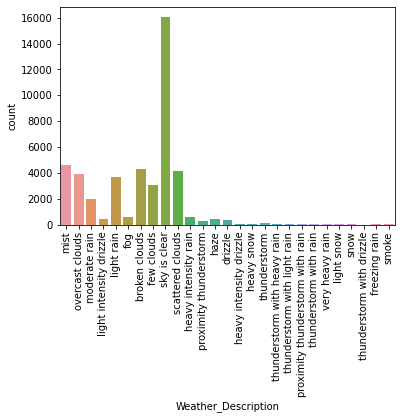

In [13]:
#27 groups lets group them
chart = sns.countplot(data=final_df_nona, x='Weather_Description')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None

In [14]:
#We decided to narrow down our WeatherDescriptions
final_df_nona['Weather_Description_Five'] = final_df_nona['Weather_Description']

#Cloudy
final_df_nona['Weather_Description_Five'].replace(['broken clouds','few clouds','overcast clouds','scattered clouds'],'Cloudy',inplace=True)

#Fog
final_df_nona['Weather_Description_Five'].replace(['fog','haze','mist','smoke'],'Fog',inplace=True)

#Rainy
final_df_nona['Weather_Description_Five'].replace(['drizzle','freezing rain','heavy intensity drizzle','heavy intensity rain','light intensity drizzle','light rain','moderate rain','proximity thunderstorm','proximity thunderstorm with rain','thunderstorm','thunderstorm with drizzle','thunderstorm with heavy rain','thunderstorm with light rain','thunderstorm with rain','very heavy rain'],'Rainy',inplace=True)

#Snow
final_df_nona['Weather_Description_Five'].replace(['heavy snow','light snow','snow'],'Snow',inplace=True)

#Sunny
final_df_nona['Weather_Description_Five'].replace(['sky is clear'],'Sunny',inplace=True)




In [15]:
#final_df_nona[final_df_nona['Weather_Description']=='broken clouds']
final_df_nona['Weather_Description_Five'].unique()

array(['Fog', 'Cloudy', 'Rainy', 'Sunny', 'Snow'], dtype=object)

# Exploratory Data Analysis

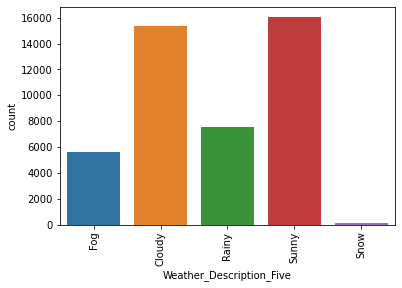

In [16]:
#5 groups now
chart = sns.countplot(data=final_df_nona, x='Weather_Description_Five')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None

In [17]:
final_df_nona.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_speed,Month
count,44661.000000,44661.000000,44661.000000,44661.000000,44661.000000,44661.000000
mean,70.190457,1020.135935,288.942611,171.895949,2.386333,6.655874
std,21.384329,10.286126,9.122144,105.390496,1.598926,3.464354
min,8.000000,957.000000,255.658333,0.000000,0.000000,1.000000
25%,55.000000,1015.000000,282.102667,64.000000,1.000000,4.000000
50%,73.000000,1020.000000,290.149059,196.000000,2.000000,7.000000
75%,88.000000,1026.000000,295.790000,246.000000,3.000000,10.000000
max,100.000000,1055.000000,310.900000,360.000000,13.000000,12.000000


C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


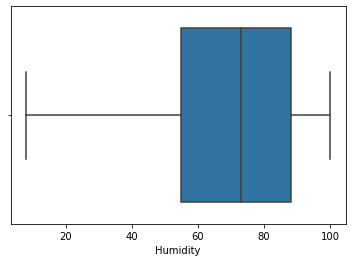

In [18]:
#Humidity looks good
sns.boxplot(final_df_nona['Humidity'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


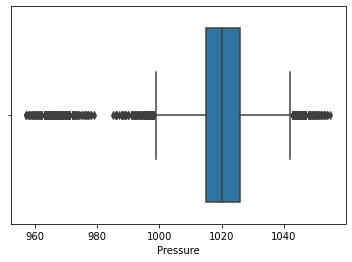

In [19]:
#Pressure has some outliers
sns.boxplot(final_df_nona['Pressure'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


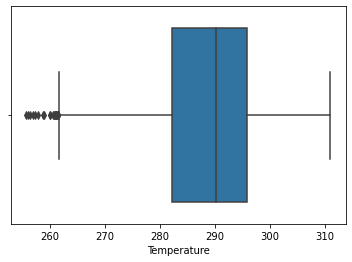

In [20]:
#Temperature has some outliers
sns.boxplot(final_df_nona['Temperature'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


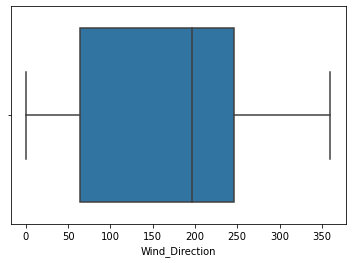

In [21]:
#Wind_Direction looks good
sns.boxplot(final_df_nona['Wind_Direction'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


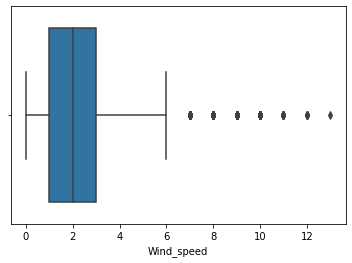

In [22]:
#Wind_Direction got some outliers
sns.boxplot(final_df_nona['Wind_speed'])
plt.show()

In [23]:
#This function removes outliers
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25)- iqr)].index, inplace=True)

In [24]:
#Keep the orginal just incase removing the outliers causes too much of a dataloss
final_df_nona_no_outliers = final_df_nona.copy()


In [25]:
#All these have outliers
#Pressure
#Temperature
#Wind_speed
drop_outliers(final_df_nona_no_outliers,'Pressure')
drop_outliers(final_df_nona_no_outliers,'Temperature')
drop_outliers(final_df_nona_no_outliers,'Wind_speed')

In [26]:
#44661
#len(final_df_nona.index)


#42601 count after remvoing outliers
len(final_df_nona_no_outliers.index)

#Data loss of 2060, we can alway use the original data frame final_df_nona if theres an issue

42601

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


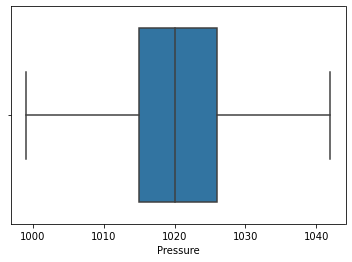

In [27]:
#Pressure now looks normal
sns.boxplot(final_df_nona_no_outliers['Pressure'])
#sns.boxplot(final_df_nona_test['Temperature'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


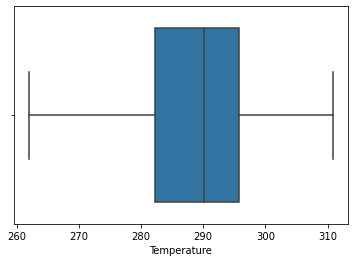

In [28]:
#Temperature now looks normal
sns.boxplot(final_df_nona_no_outliers['Temperature'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


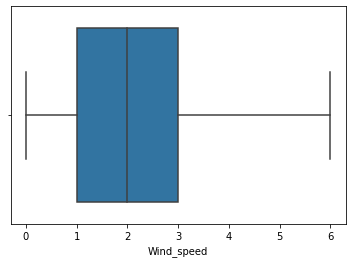

In [29]:
#Wind_speed now looks normal
sns.boxplot(final_df_nona_no_outliers['Wind_speed'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


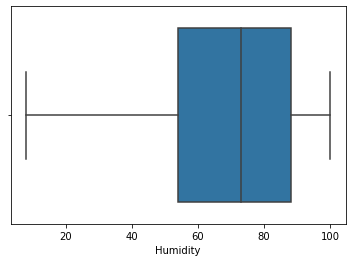

In [30]:
#Humidity
sns.boxplot(final_df_nona_no_outliers['Humidity'])
plt.show()

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


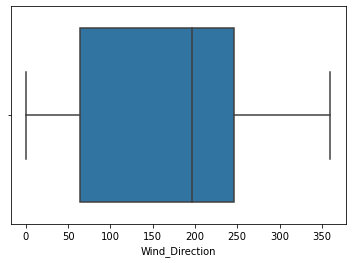

In [31]:
#Wind_Direction
sns.boxplot(final_df_nona_no_outliers['Wind_Direction'])
plt.show()

In [32]:
#final_df_nona.head()
final_df_nona_no_outliers.sort_values(by=['datetime'], ascending=False).head()

,datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Month,Weather_Description_Five
45252,2017-11-30 00:00:00,41.0,1024.0,285.61,haze,169.0,0.0,11,Fog
45251,2017-11-29 23:00:00,38.0,1023.0,287.58,few clouds,169.0,0.0,11,Cloudy
45250,2017-11-29 22:00:00,24.0,1023.0,292.06,few clouds,320.0,1.0,11,Cloudy
45249,2017-11-29 21:00:00,21.0,1023.0,293.90,few clouds,320.0,1.0,11,Cloudy
45248,2017-11-29 20:00:00,21.0,1023.0,294.15,few clouds,320.0,1.0,11,Cloudy


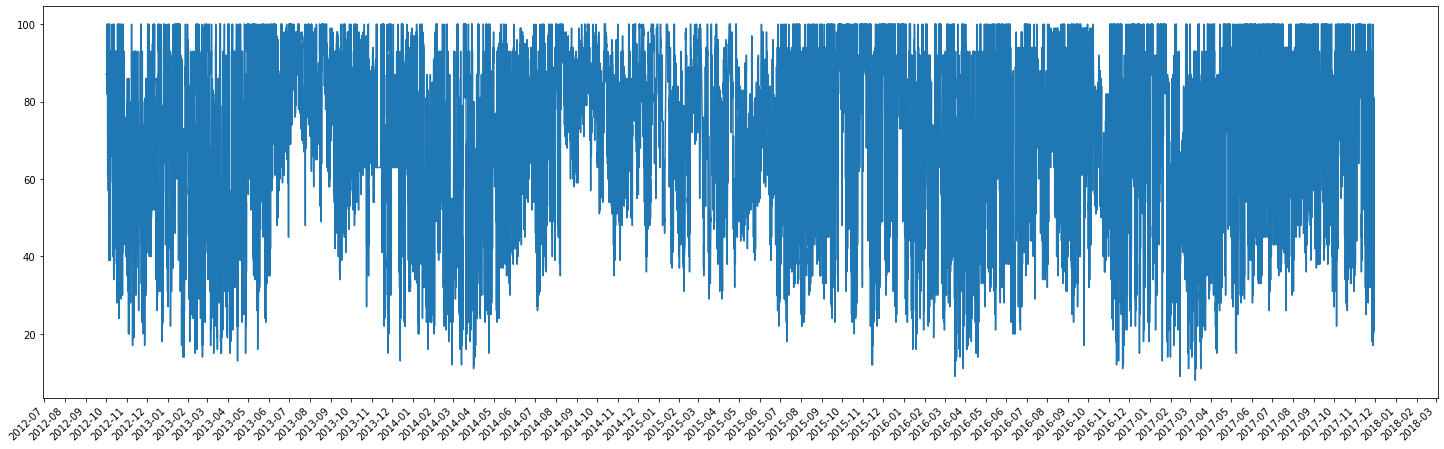

In [33]:
#Humidity goes up in the Summer
date = final_df_nona_no_outliers["datetime"]
value = final_df_nona_no_outliers["Humidity"]

fig, ax = plt.subplots(figsize=(25, 8))

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
#ax.xticks(rotation = 'vertical')

ax.plot(date, value);

fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

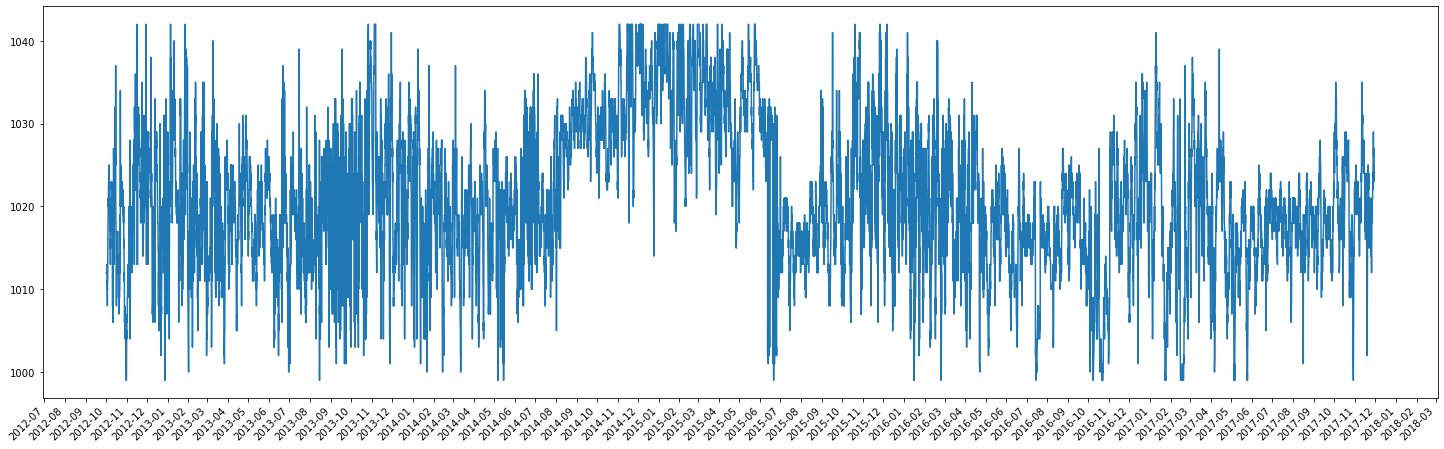

In [34]:
#Pressure 
date = final_df_nona_no_outliers["datetime"]
value = final_df_nona_no_outliers["Pressure"]

fig, ax = plt.subplots(figsize=(25, 8))

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
#ax.xticks(rotation = 'vertical')

ax.plot(date, value);

fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

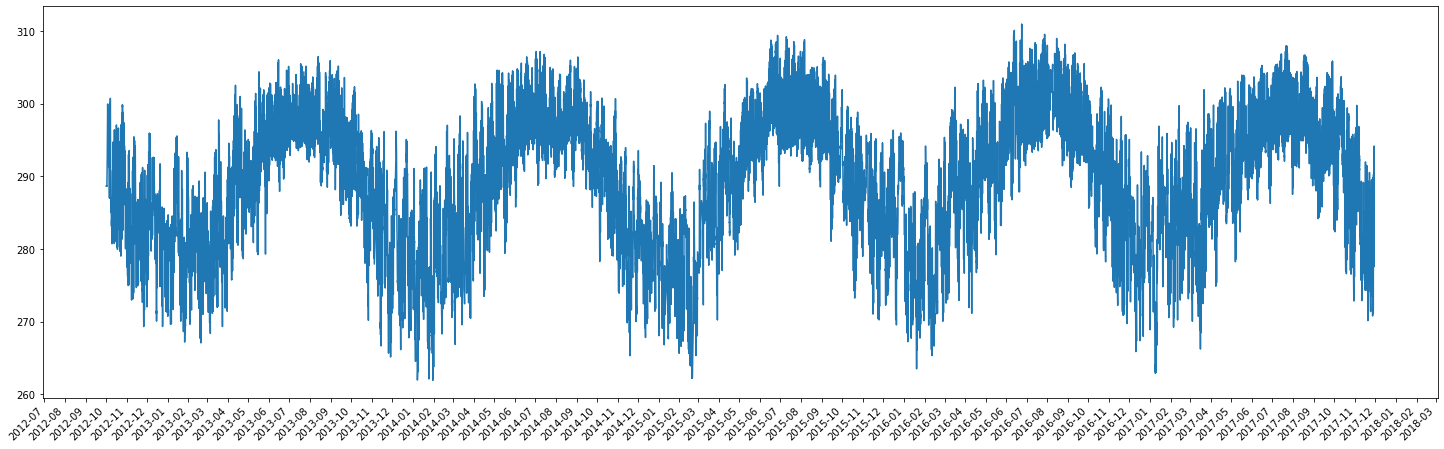

In [35]:
#Temperature
date = final_df_nona_no_outliers["datetime"]
value = final_df_nona_no_outliers["Temperature"]

fig, ax = plt.subplots(figsize=(25, 8))

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
#ax.xticks(rotation = 'vertical')

ax.plot(date, value);

fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

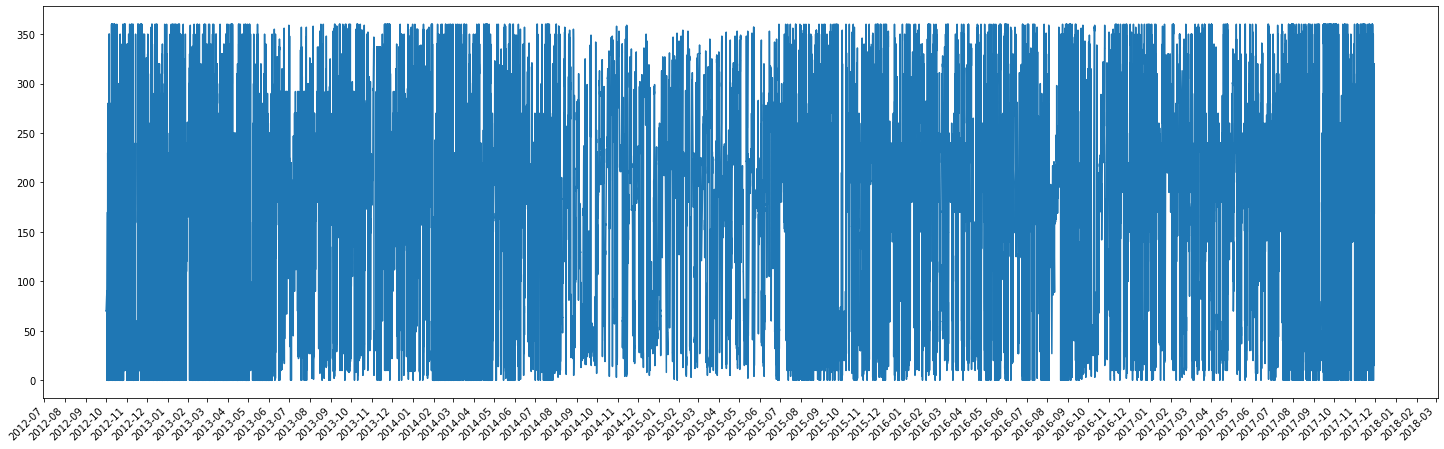

In [36]:
#Wind_Direction
date = final_df_nona_no_outliers["datetime"]
value = final_df_nona_no_outliers["Wind_Direction"]

fig, ax = plt.subplots(figsize=(25, 8))

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
#ax.xticks(rotation = 'vertical')

ax.plot(date, value);

fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

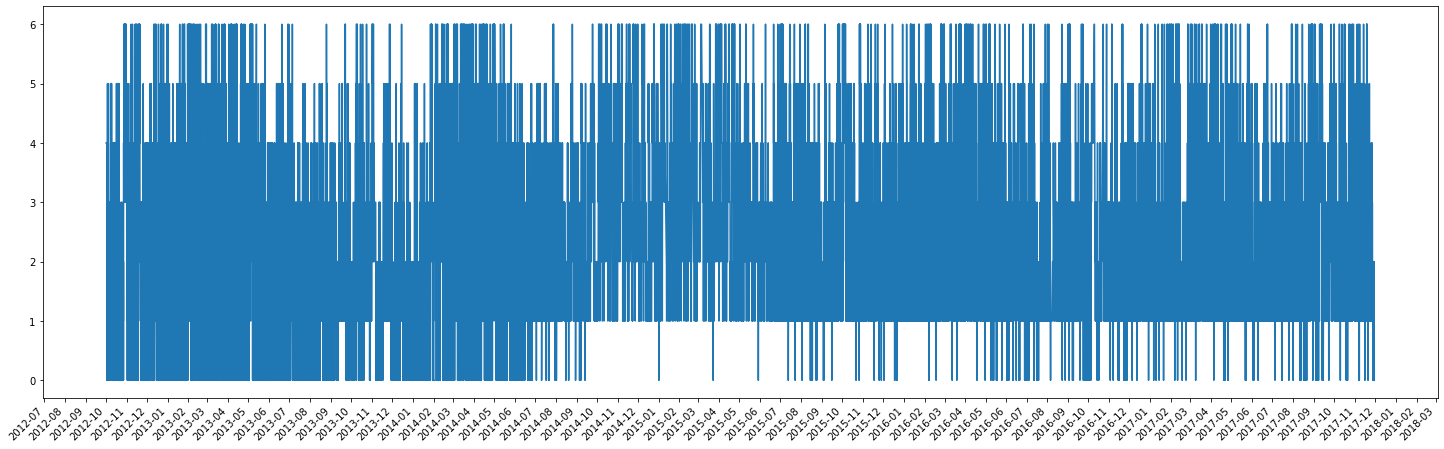

In [37]:
#Wind_speed
date = final_df_nona_no_outliers["datetime"]
value = final_df_nona_no_outliers["Wind_speed"]

fig, ax = plt.subplots(figsize=(25, 8))

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
#ax.xticks(rotation = 'vertical')

ax.plot(date, value);

fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
None

In [38]:
#sns.pairplot(data=final_df_nona_no_outliers,hue='Weather_Description_Five')

<AxesSubplot:>

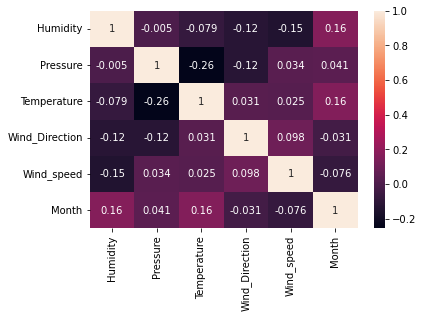

In [39]:
sns.heatmap(data=final_df_nona_no_outliers.corr(),annot=True)

<AxesSubplot:xlabel='Weather_Description_Five', ylabel='count'>

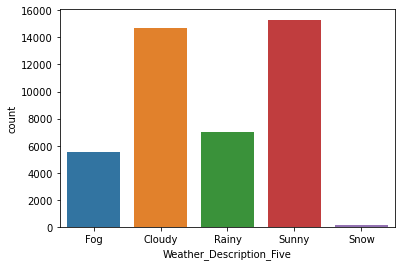

In [40]:
sns.countplot(data=final_df_nona_no_outliers, x='Weather_Description_Five')

# Use a label encoder for Weather_Description, then create x and y

In [41]:
#Label Encoder
label_encoder = preprocessing.LabelEncoder()

final_df_nona_no_outliers['Weather_Description_Five_LE']= label_encoder.fit_transform(final_df_nona_no_outliers['Weather_Description_Five'])


In [42]:
#Onehotencoder for the month column

enc = OneHotEncoder(handle_unknown='ignore')

transformed_df = pd.DataFrame(enc.fit_transform(final_df_nona_no_outliers[['Month']]).toarray())

final_df_nona_no_outliers = final_df_nona_no_outliers.join(transformed_df)


In [43]:
final_df_nona_no_outliers = final_df_nona_no_outliers.dropna()

len(final_df_nona_no_outliers.index)

40018

In [44]:
final_df_nona_no_outliers.head()

,datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Month,Weather_Description_Five,Weather_Description_Five_LE,...,2,3,4,5,6,7,8,9,10,11
1,2012-10-01 13:00:00,87.0,1012.0,288.650000,mist,70.0,4.0,10,Fog,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2012-10-01 14:00:00,87.0,1012.0,288.650172,overcast clouds,70.0,4.0,10,Cloudy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2012-10-01 15:00:00,87.0,1012.0,288.650582,overcast clouds,71.0,4.0,10,Cloudy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2012-10-01 16:00:00,87.0,1012.0,288.650991,overcast clouds,71.0,4.0,10,Cloudy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2012-10-01 17:00:00,87.0,1012.0,288.651401,overcast clouds,72.0,4.0,10,Cloudy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
#final_df_nona_test.head()


X = final_df_nona_no_outliers.drop(['Weather_Description','Weather_Description_Five_LE','datetime','Month','Weather_Description_Five'],axis=1)
y = final_df_nona_no_outliers['Weather_Description_Five_LE']

In [46]:
#X.head()
y.head()

1    1
2    0
3    0
4    0
5    0
Name: Weather_Description_Five_LE, dtype: int32

# Train Test Split

In [47]:
#Train Test/Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [48]:
#Standard Scaler
#Standardization leads to a) more stable b) less influenced by the range of variables c) faster fitting d) more stable performance

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Choose Model Type, maybe for extra credit use neural network possibly Keras keras functional or sequential

# lr = LogisticRegression()
# rf = RandomForestClassifier(bootstrap=False)
# gbc = GradientBoostingClassifier()
# dt = DecisionTreeClassifier()
# svc = SVC()
# knn= KNeighborsClassifier()

In [49]:
lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

#lr = LogisticRegression()
#lr.fit(x_train, y_train)

In [50]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)

C:\Users\davidm\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier()

In [51]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)))
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))

LogReg Accuracy = 0.51
RandFor Accuracy = 0.65
GBC Accuracy = 0.56
DT Accuracy = 0.54
SVC Accuracy = 0.56
KNN Accuracy = 0.60


In [53]:

#Inference test data
#y_pred_lr = lr.predict(x_test)

# The Accuracy isnt very good so Im going to try to cut down on the Weather_Descriptions

In [52]:
#final_df_nona_test_newtry = final_df_nona_test.copy()

final_df_nona_no_outliers['Weather_Description_two'] = final_df_nona_no_outliers['Weather_Description_Five']
final_df_nona_no_outliers['Weather_Description_two'].replace(['Fog','Cloudy','Rainy','Snow'],'Other',inplace=True)

#final_df_nona_no_outliers.head()

In [53]:
final_df_nona_no_outliers['Weather_Description_two'].unique()

array(['Other', 'Sunny'], dtype=object)

In [54]:
#Label Encoder
label_encoder = preprocessing.LabelEncoder()

final_df_nona_no_outliers['Weather_Description_LE_two']= label_encoder.fit_transform(final_df_nona_no_outliers['Weather_Description_two'])

In [55]:
X = final_df_nona_no_outliers.drop(['Weather_Description','Weather_Description_Five_LE','Weather_Description_Five','datetime','Month','Weather_Description_two','Weather_Description_LE_two'],axis=1)
y = final_df_nona_no_outliers['Weather_Description_LE_two']

In [56]:
X.head(100)

,Humidity,Pressure,Temperature,Wind_Direction,Wind_speed,0,1,2,3,4,5,6,7,8,9,10,11
1,87.0,1012.0,288.650000,70.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,87.0,1012.0,288.650172,70.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,87.0,1012.0,288.650582,71.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,87.0,1012.0,288.650991,71.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,87.0,1012.0,288.651401,72.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,93.0,1024.0,291.690000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,88.0,1025.0,292.940000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,73.0,1025.0,294.610000,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,73.0,1025.0,296.110000,290.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [58]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [59]:
lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

In [60]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test))) #For multiple outcomes
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test))) #For multiple outcomes
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))

LogReg Accuracy = 0.70
RandFor Accuracy = 0.81
GBC Accuracy = 0.73
DT Accuracy = 0.72
SVC Accuracy = 0.74
KNN Accuracy = 0.77


In [62]:
print('RandFor Accuracy\n',classification_report(y_test,rf.predict(x_test)))

RandFor Accuracy
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      7523
           1       0.78      0.68      0.72      4483

    accuracy                           0.81     12006
   macro avg       0.80      0.78      0.79     12006
weighted avg       0.80      0.81      0.80     12006



In [66]:
len(final_df.index)

45253

In [68]:

sc = StandardScaler()
X1 = sc.fit_transform(X)

In [69]:
np.unique(label_encoder.inverse_transform(rf.predict(X1)))

array(['Other', 'Sunny'], dtype=object)

In [70]:
final_df_nona_no_outliers['Weather_Description_two_Prediction'] = label_encoder.inverse_transform(rf.predict(X1))
#y_pred_lr = rf.predict(X)
#final_df_nona_no_outliers

In [71]:
#final_df_nona_no_outliers.head()

final_df['Weather_Description_two_Prediction'] = pd.Series(final_df_nona_no_outliers['Weather_Description_two_Prediction'])

final_df['Weather_Description_Five'] = pd.Series(final_df_nona_no_outliers['Weather_Description_Five'])

final_df['Weather_Description_two'] = pd.Series(final_df_nona_no_outliers['Weather_Description_two'])


final_df['Dropped'] = final_df.isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [72]:
final_df.head()

,datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Weather_Description_two_Prediction,Weather_Description_Five,Weather_Description_two,Dropped
0,2012-10-01 12:00:00.0000000,None,None,None,None,None,None,NaN,NaN,NaN,1
1,2012-10-01 13:00:00.0000000,87.0,1012.0,288.65,mist,70.0,4.0,Other,Fog,Other,0
2,2012-10-01 14:00:00.0000000,87.0,1012.0,288.650172214,overcast clouds,70.0,4.0,Other,Cloudy,Other,0
3,2012-10-01 15:00:00.0000000,87.0,1012.0,288.650581705,overcast clouds,71.0,4.0,Other,Cloudy,Other,0
4,2012-10-01 16:00:00.0000000,87.0,1012.0,288.650991196,overcast clouds,71.0,4.0,Other,Cloudy,Other,0


In [85]:
# len(final_df.index) is 45253
#len(final_df_nona_no_outliers.index) is 40018


40018

In [84]:
final_df[final_df['Dropped']==1]

,datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Weather_Description_two_Prediction,Weather_Description_Five,Weather_Description_two,Dropped
0,2012-10-01 12:00:00.0000000,None,None,None,None,None,None,NaN,NaN,NaN,1
73,2012-10-04 13:00:00.0000000,None,1034.0,292.6,sky is clear,0.0,0.0,NaN,NaN,NaN,1
219,2012-10-10 15:00:00.0000000,None,1036.0,282.7,sky is clear,316.0,0.0,NaN,NaN,NaN,1
464,2012-10-20 20:00:00.0000000,21.0,1007.0,294.9,sky is clear,230.0,7.0,NaN,NaN,NaN,1
465,2012-10-20 21:00:00.0000000,None,1007.0,294.29,sky is clear,230.0,5.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00.0000000,21.0,1023.0,294.15,few clouds,320.0,1.0,NaN,NaN,NaN,1
45249,2017-11-29 21:00:00.0000000,21.0,1023.0,293.9,few clouds,320.0,1.0,NaN,NaN,NaN,1
45250,2017-11-29 22:00:00.0000000,24.0,1023.0,292.06,few clouds,320.0,1.0,NaN,NaN,NaN,1
45251,2017-11-29 23:00:00.0000000,38.0,1023.0,287.58,few clouds,169.0,0.0,NaN,NaN,NaN,1


In [ ]:
45253 - 5235 = 40018

In [73]:
#The Insert doesnt like NA's for the Insert
final_dfResults = final_df.fillna(value='')

In [66]:
server = 'weatherdata.database.windows.net' 
database = 'weather' 
username = cf.username
password = cf.password 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:
for index, row in final_dfResults.iterrows():
     cursor.execute("INSERT INTO Results (datetime,Humidity,Pressure,Temperature,Weather_Description,Wind_Direction,Wind_speed,Weather_Description_two_Prediction,Weather_Description_Five,Weather_Description_two,Dropped) values(?,?,?,?,?,?,?,?,?,?,?)", row.datetime, row.Humidity, row.Pressure,row.Temperature,row.Weather_Description,row.Wind_Direction,row.Wind_speed,row.Weather_Description_two_Prediction,row.Weather_Description_Five,row.Weather_Description_two,row.Dropped)
cnxn.commit()
cursor.close()


In [1]:
#Save Model and pickle the data

# Grab the orginal dataframe final_df
# Add a Column called Dropped 1 for Yes 2 for No
# Add a prediction Result column
# Add Weather_Description_Five and Weather_Description_two

In [78]:
#filepath = Path('folder/subfolder/out.csv')  

final_dfResults.to_csv('C:/Trash/Class/FinalProject/BestFinalProject/final_dfResults.csv', index=False) 